<a href="https://colab.research.google.com/github/poverty149/Speech-Emotion-Recognition/blob/main/speechemotionrecognitionrnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import os 
import librosa 
import wave 
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 

import keras 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from keras.layers import * 
from tensorflow.keras.optimizers import RMSprop 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/Mydrive

/content/drive


In [8]:
!unzip "archive.zip"

Archive:  archive.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03-01-03-02-02-02-01.wav 

In [9]:
def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    
    y, sr = librosa.load(wav_file_name,duration=3
                                  ,offset=0.5)
    #set n_mfcc = 40
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [10]:
!unzip -u "/content/drive/My Drive/archive.zip" -d "/content/NewFolder"

Archive:  /content/drive/My Drive/archive.zip
  inflating: /content/NewFolder/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /content/NewFolder/Actor_01/03-01-03-01-01-02-01.wav  
  

In [12]:
%cd /content

/content


In [17]:
##### load full radvess speech dataset #####
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file

for dirname, _, filenames in os.walk('NewFolder/'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MFCC features/file
        
print("Finish Loading the Dataset.")

NewFolder/Actor_15/03-01-04-01-02-02-15.wav
NewFolder/Actor_15/03-01-05-02-01-01-15.wav
NewFolder/Actor_15/03-01-07-02-02-01-15.wav
NewFolder/Actor_15/03-01-03-02-01-01-15.wav
NewFolder/Actor_15/03-01-02-01-02-02-15.wav
NewFolder/Actor_15/03-01-02-01-02-01-15.wav
NewFolder/Actor_15/03-01-06-01-02-01-15.wav
NewFolder/Actor_15/03-01-01-01-01-01-15.wav
NewFolder/Actor_15/03-01-06-01-02-02-15.wav
NewFolder/Actor_15/03-01-02-02-01-02-15.wav
NewFolder/Actor_15/03-01-05-02-02-01-15.wav
NewFolder/Actor_15/03-01-06-01-01-01-15.wav
NewFolder/Actor_15/03-01-04-01-01-01-15.wav
NewFolder/Actor_15/03-01-08-01-02-02-15.wav
NewFolder/Actor_15/03-01-04-01-01-02-15.wav
NewFolder/Actor_15/03-01-03-01-01-02-15.wav
NewFolder/Actor_15/03-01-07-01-02-01-15.wav
NewFolder/Actor_15/03-01-06-02-02-02-15.wav
NewFolder/Actor_15/03-01-08-01-01-01-15.wav
NewFolder/Actor_15/03-01-03-02-02-02-15.wav
NewFolder/Actor_15/03-01-04-02-01-01-15.wav
NewFolder/Actor_15/03-01-07-01-01-02-15.wav
NewFolder/Actor_15/03-01-07-01-0

In [19]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions

#### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
ravdess_speech_data_array.shape
labels_categorical.shape
print(ravdess_speech_label_array.shape, ravdess_speech_data_array.shape, labels_categorical.shape)

(2880,) (2880, 40) (2880, 8)


In [20]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [21]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=22, epsilon=1e-08, hidden_layer_sizes=(150,), learning_rate='adaptive', max_iter=400)

In [22]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=22, hidden_layer_sizes=(150,),
              learning_rate='adaptive', max_iter=400)

In [23]:
# Predict for the test set
y_pred=model.predict(x_test)

In [24]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.97%


In [25]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.6)
validation_samples = int(number_of_samples * 0.4)
test_samples = int(number_of_samples * 0.01)

In [26]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [27]:
### train using LSTM model
##import os
os.environ['KMP_WARNINGS'] = 'off'
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(x_train,-1), y_train, validation_data=(np.expand_dims(x_test, -1), y_test),
                      epochs=150, batch_size = 32)

Epoch 1/150
72/72 [==============================] - 5s 43ms/step - loss: 2.0593 - accuracy: 0.1567 - val_loss: 2.0158 - val_accuracy: 0.2170
Epoch 2/150
72/72 [==============================] - 3s 36ms/step - loss: 1.9898 - accuracy: 0.2088 - val_loss: 1.9104 - val_accuracy: 0.2639
Epoch 3/150
72/72 [==============================] - 3s 35ms/step - loss: 1.9305 - accuracy: 0.2426 - val_loss: 1.8455 - val_accuracy: 0.2830
Epoch 4/150
72/72 [==============================] - 3s 35ms/step - loss: 1.8804 - accuracy: 0.2609 - val_loss: 1.8749 - val_accuracy: 0.3090
Epoch 5/150
72/72 [==============================] - 3s 36ms/step - loss: 1.8779 - accuracy: 0.2630 - val_loss: 1.8409 - val_accuracy: 0.2934
Epoch 6/150
72/72 [==============================] - 3s 35ms/step - loss: 1.8278 - accuracy: 0.2834 - val_loss: 1.7897 - val_accuracy: 0.3281
Epoch 7/150
72/72 [==============================] - 3s 35ms/step - loss: 1.8148 - accuracy: 0.3108 - val_loss: 1.7519 - val_accuracy: 0.3385
Epoch 

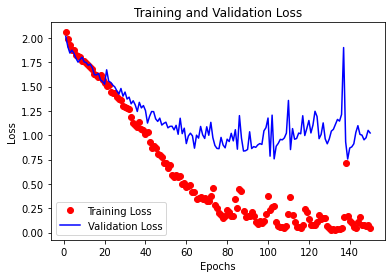

In [28]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

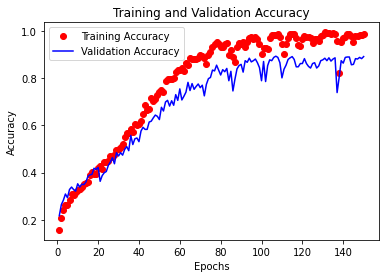

In [29]:
### accuracy plots using LSTM model
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
model_A.save_weights("Model_LSTM.h5")

In [31]:
np.expand_dims(x_train,-1).shape

(2304, 40, 1)